# Insurance Claims- Fraud Detection
#### Problem Statement:
#### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc

from sklearn.model_selection import cross_val_score,GridSearchCV

In [2]:
# Setting style and color palette
sns.color_palette("Set3")
sns.set_style("whitegrid")

### Loading Dataset

In [3]:
df= pd.read_csv("Auto_insaurance_claim.csv",parse_dates=['policy_bind_date', 'incident_date'])

In [4]:
pd.set_option("display.max_columns",None)
# Reading top 5 rows
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
# Checking the last rows
df.tail(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,2015-02-26,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
# checking the rows and columns of dataset
print("Dataset contains {} rows and {} columns.".format(len(df),len(df.columns)))

Dataset contains 1000 rows and 40 columns.


In [7]:
# checking the columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
# Let's check the data type
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [9]:
# Let's check full information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [10]:
# Checking null values

if df.isnull().sum().any()==True:
    print("Null values present in dataset")
else:
    print("There is no null values in dataset")

Null values present in dataset


In [11]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

###### _C39 feature contaains zero values so there is no need of this column. We will drop it .

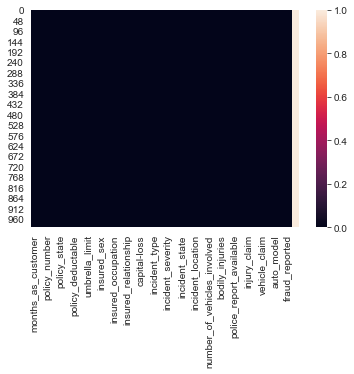

In [12]:
# checking heatmap for null values
sns.heatmap(df.isnull())

In [13]:
# Let's check the duplicate values in data
if df.duplicated().sum().any()==True:
    print("Our data contains duplicate values")
else:
    print("There are no duplicate values in our data")

There are no duplicate values in our data


In [14]:
# Let's check features description
df.describe()    

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


#### Key Observations :-
* All features are having difference in mean and median except bodily_injuries and auto_year which means that skewness is present in the data.
* High difference in 75th percentile and 100th percentile shows presence of outliers.
* While some feataures are also haivng high diffenence in 0 percentile and 25th percentile 

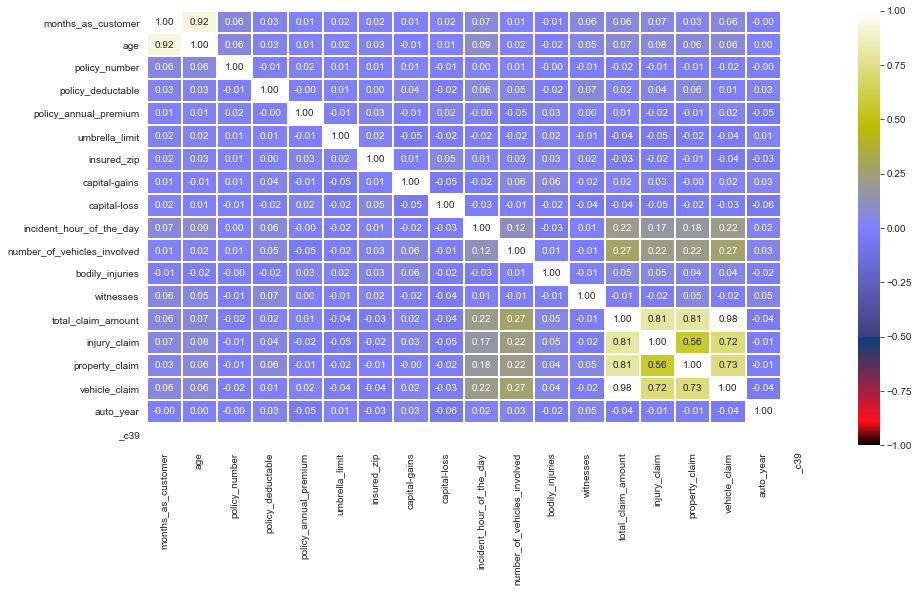

In [15]:
# plotting correlation graph
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='gist_stern',annot=True,fmt=".2f",vmin=-1,
            vmax=1, center= 0 ,linewidths=1, linecolor='white')

#### Key Observations :-

* months_as_customer is highly positive correlated to age. The bond is very strong 
* While total_claim_amount, injury_claim, prperty_claim, vehile_claim also shares strong positive correlation with each others.
* Most of the columns are positive correlated with each other while a few are negative correlated with least correlation values.

### Finding distinct values in features

In [16]:
for i in df.columns:
    if df[i].dtype=="object":
        if df[i].nunique()<15:
            print(i,"contains values -->\n",df[i].value_counts())
            print("\n")

policy_state contains values -->
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


policy_csl contains values -->
 250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


insured_sex contains values -->
 FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


insured_education_level contains values -->
 JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


insured_occupation contains values -->
 machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


insured_relationship contains values -->
 own-child 

###### Some of the features contains class "?", which can be treates as nan value. So first of all replace "?" with nan value.

In [17]:
df.replace("?",np.NaN,inplace=True)

In [18]:
# Now checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [19]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [20]:
df[['incident_type','collision_type','property_damage','police_report_available']]

,incident_type,collision_type,property_damage,police_report_available
0,Single Vehicle Collision,Side Collision,YES,YES
1,Vehicle Theft,NaN,NaN,NaN
2,Multi-vehicle Collision,Rear Collision,NO,NO
3,Single Vehicle Collision,Front Collision,NaN,NO
4,Vehicle Theft,NaN,NO,NO
...,...,...,...,...
995,Single Vehicle Collision,Front Collision,YES,NaN
996,Single Vehicle Collision,Rear Collision,YES,NaN
997,Multi-vehicle Collision,Side Collision,NaN,YES
998,Single Vehicle Collision,Rear Collision,NaN,YES


In [21]:
# So we can see that where the incident type is parked_car or Vehile_theft ,there is null values in collision type.
# so in place of nan values we will fill no collision.

def impute_nan(cols):
    collision_type=cols[0]
    incident_type=cols[1]
    
    if pd.isnull(collision_type):
        
        if incident_type=="Parked Car" or "Vehicle Theft":
            return "No Collision"
        else:
            return 24
    else:
        return(collision_type)

In [22]:
df['collision_type']=df[['collision_type','incident_type']].apply(impute_nan,axis=1)

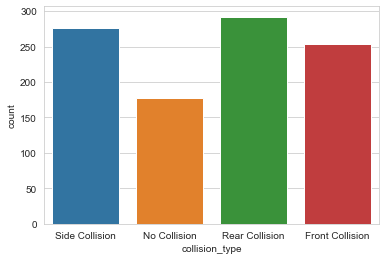

In [23]:
sns.countplot(df['collision_type'])

In [24]:
# If there is no collision then there are chances that there is no damage of property.
# So we are filling null values based on collision type.

def impute_nan(cols):
    property_damage=cols[0]
    collision_type=cols[1]
    
    if pd.isnull(property_damage):
        
        if collision_type=="No Collision":
            return "NO"
        else:
            return "YES"
    else:
        return(property_damage)

In [25]:
df['property_damage']=df[['property_damage','collision_type']].apply(impute_nan,axis=1)

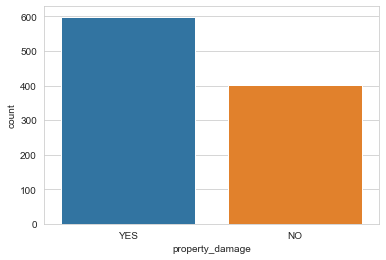

In [26]:
sns.countplot(df['property_damage'])

In [27]:
df['police_report_available'].mode()

0    NO
dtype: object

In [28]:
df['police_report_available'].fillna("NO",inplace=True)

In [29]:
# Dropping _C39 columns
df.drop('_c39',axis=1,inplace=True)

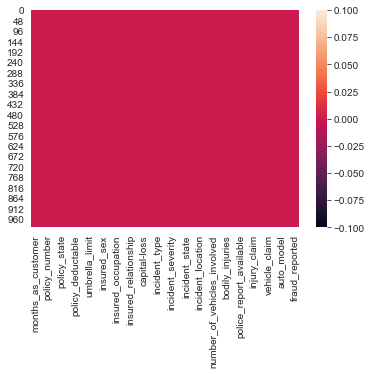

In [30]:
sns.heatmap(df.isnull())

### Data visualization

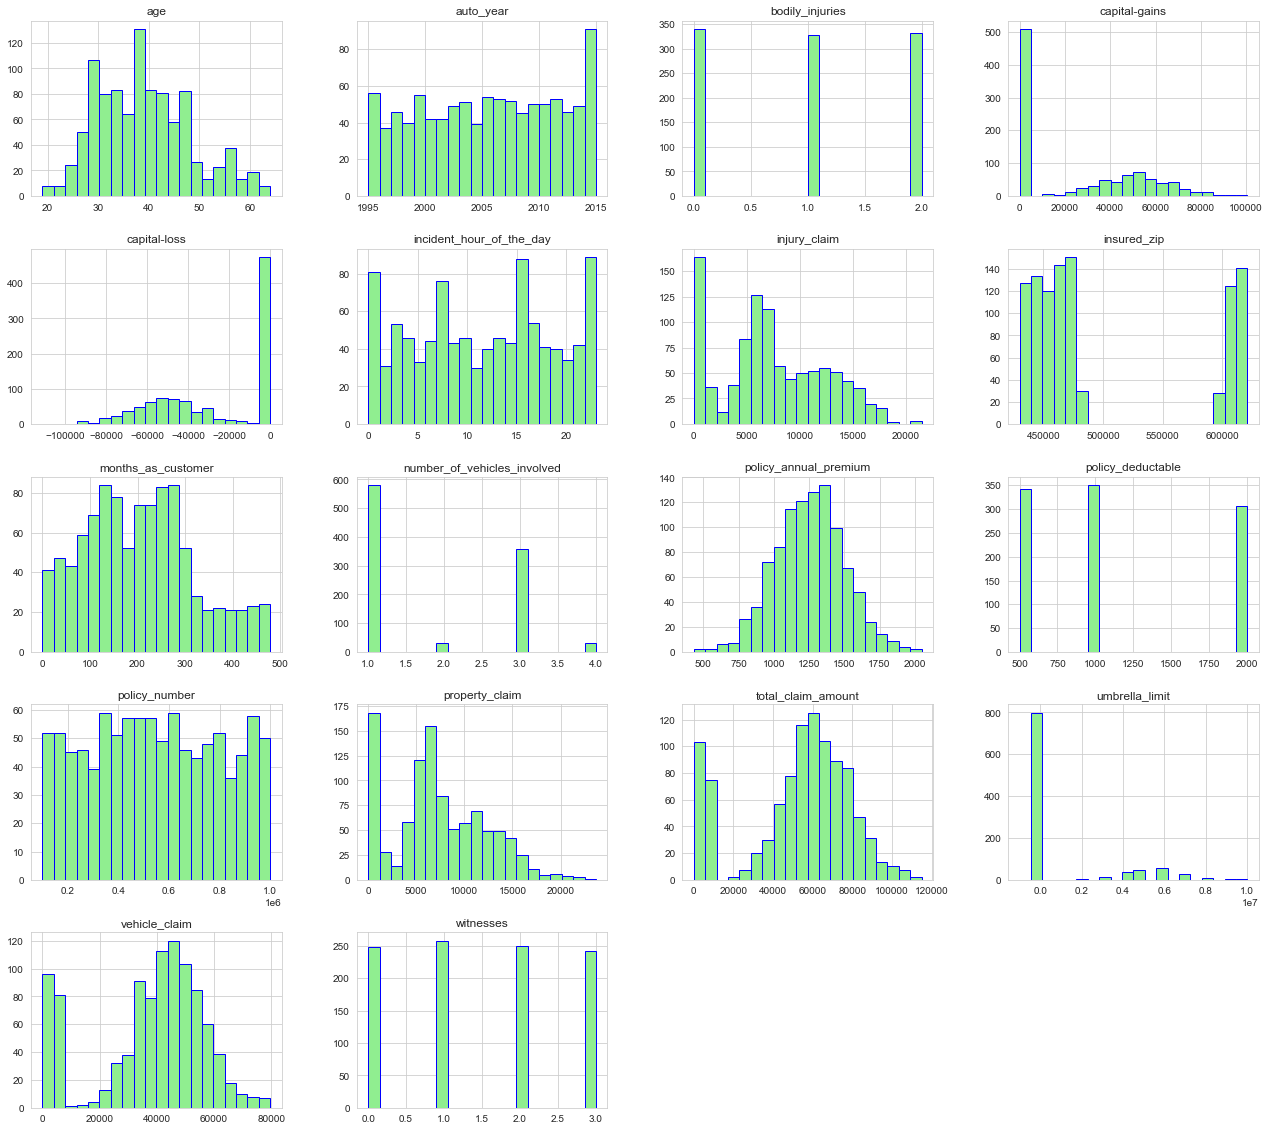

In [31]:
df.hist(figsize=(22,20),bins=20,color='lightgreen',edgecolor='blue')
plt.show()

In [32]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

Skewness of months_as_customer = 0.36
Skewness of age = 0.48


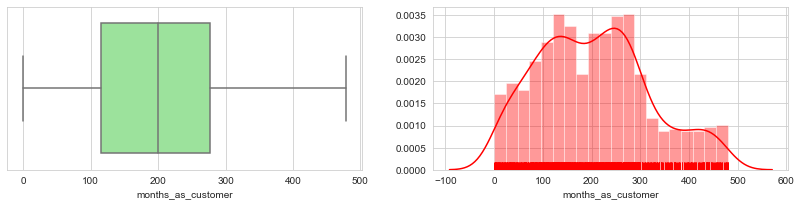

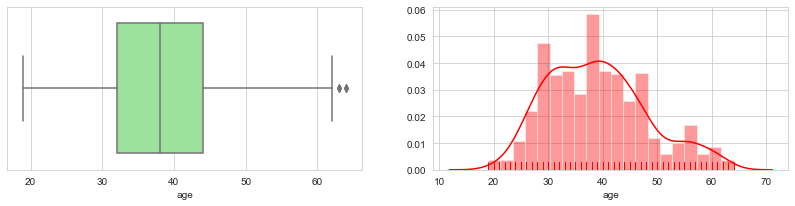

In [33]:
for i in ['months_as_customer','age']:
    f=plt.figure(figsize=(14,3))
    f.add_subplot(1,2,1)
    sns.boxplot(df[i],color='lightgreen')
    f.add_subplot(1,2,2)
    sns.distplot(df[i],bins=20,color='red',rug=True)
    print("Skewness of %s = %0.2f"%(i,df[i].skew()))

###### Age is with outleirs and due to outleirs having some skewness in data.

Skewness of total_claim_amount = -0.59
Skewness of injury_claim = 0.26
Skewness of property_claim = 0.38
Skewness of vehicle_claim = -0.62


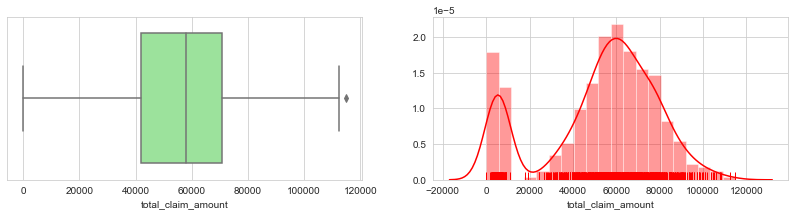

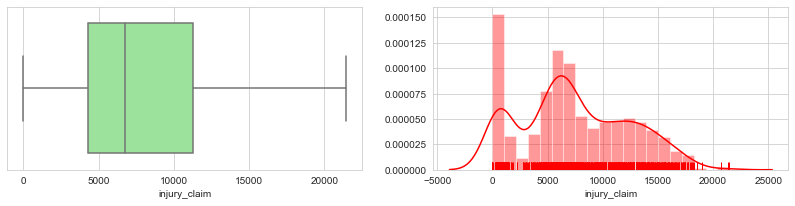

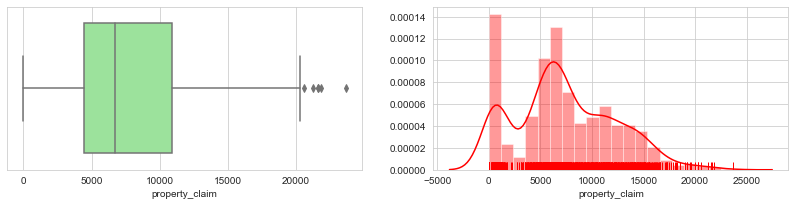

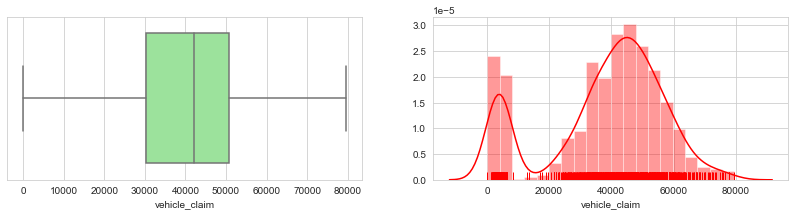

In [34]:
for i in ['total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim']:
    f=plt.figure(figsize=(14,3))
    f.add_subplot(1,2,1)
    sns.boxplot(df[i],color='lightgreen')
    f.add_subplot(1,2,2)
    sns.distplot(df[i],bins=20,color='red',rug=True)
    print("Skewness of %s = %0.2f"%(i,df[i].skew()))
    

###### Total claim amount is having skewness , outliers are also present in total_claim_amount. The reason for skewness may be the outliers. While property_claim is also having skewness and outleirs.

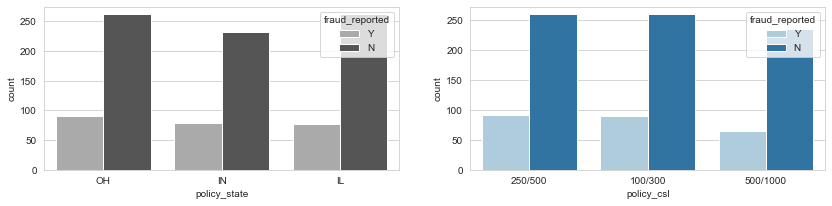

In [35]:
f=plt.figure(figsize=(14,3))
f.add_subplot(1,2,1)
sns.countplot(x=df['policy_state'],hue=df['fraud_reported'],palette='binary')
f.add_subplot(1,2,2)
sns.countplot(x=df['policy_csl'],hue=df['fraud_reported'],palette='Paired')

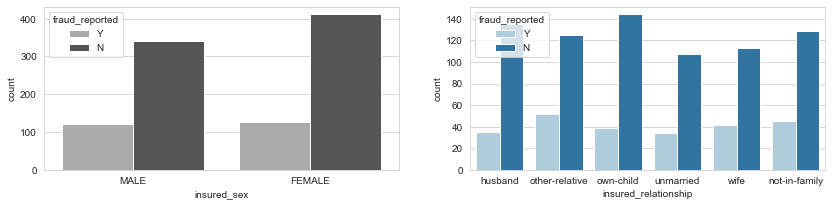

In [36]:
f=plt.figure(figsize=(14,3))
f.add_subplot(1,2,1)
sns.countplot(x=df['insured_sex'],hue=df['fraud_reported'],palette='binary')
f.add_subplot(1,2,2)
sns.countplot(x=df['insured_relationship'],hue=df['fraud_reported'],palette='Paired')

###### In feature insured_relationship there is need of data cleaning as we can see that husband ,wife comes in married ,so it will be good to keep claases few.

In [37]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [38]:
df['insured_relationship'].replace({'husband':'married','wife':'married','own-child':'married','not-in-family':'other-relative'},inplace=True)

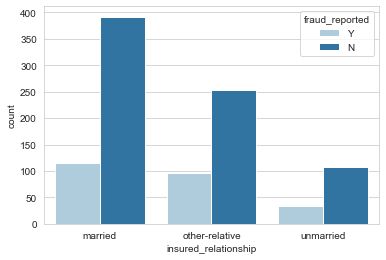

In [39]:
sns.countplot(x=df['insured_relationship'],hue=df['fraud_reported'],palette='Paired')

In [40]:
tbl=pd.crosstab(df['number_of_vehicles_involved'], df['fraud_reported'])
tbl

fraud_reported,N,Y
number_of_vehicles_involved,,
1,448,133
2,21,9
3,264,94
4,20,11


Text(0, 0.5, '% of Reports')

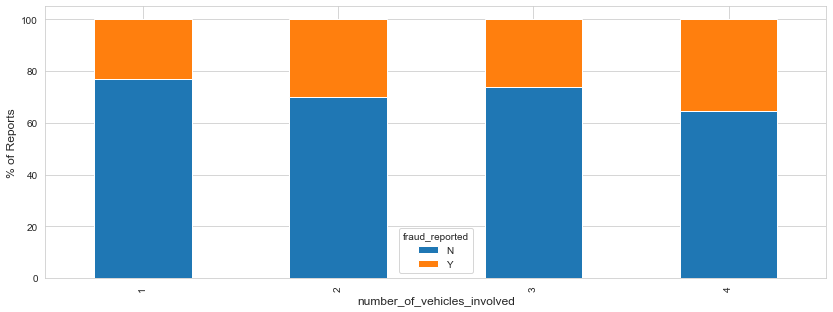

In [41]:

tbl=pd.crosstab(df['number_of_vehicles_involved'], df['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('number_of_vehicles_involved',fontsize=12)
plt.ylabel('% of Reports',fontsize=12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

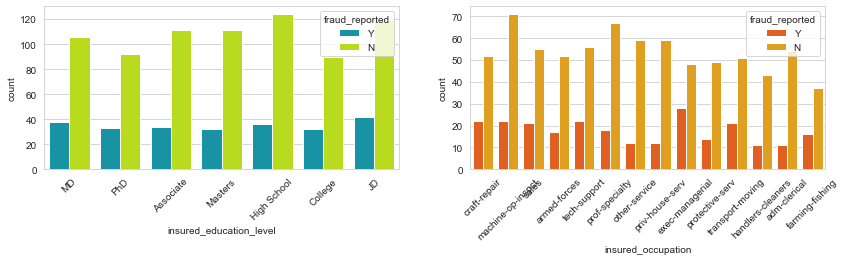

In [42]:
f=plt.figure(figsize=(14,3))
f.add_subplot(1,2,1)
sns.countplot(x=df['insured_education_level'],hue=df['fraud_reported'],palette='nipy_spectral')
plt.xticks(rotation=45)
f.add_subplot(1,2,2)
sns.countplot(x=df['insured_occupation'],hue=df['fraud_reported'],palette='autumn')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

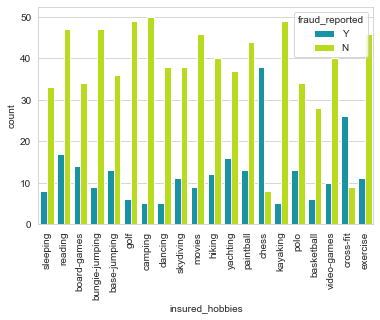

In [43]:
sns.countplot(x=df['insured_hobbies'],hue=df['fraud_reported'],palette='nipy_spectral')
plt.xticks(rotation=90)

###### People with hobby of playing chess are more in fraud claim for insaurance.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

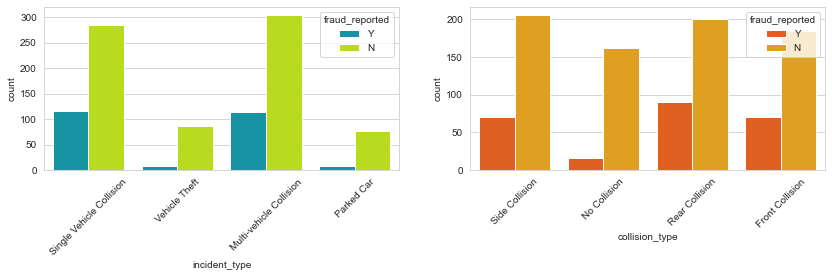

In [44]:
f=plt.figure(figsize=(14,3))
f.add_subplot(1,2,1)
sns.countplot(x=df['incident_type'],hue=df['fraud_reported'],palette='nipy_spectral')
plt.xticks(rotation=45)
f.add_subplot(1,2,2)
sns.countplot(x=df['collision_type'],hue=df['fraud_reported'],palette='autumn')
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

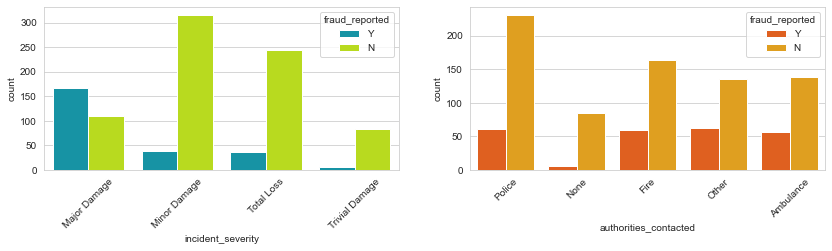

In [45]:
f=plt.figure(figsize=(14,3))
f.add_subplot(1,2,1)
sns.countplot(x=df['incident_severity'],hue=df['fraud_reported'],palette='nipy_spectral')
plt.xticks(rotation=45)
f.add_subplot(1,2,2)
sns.countplot(x=df['authorities_contacted'],hue=df['fraud_reported'],palette='autumn')
plt.xticks(rotation=45)

###### In major damage there is high fraud detected in insaurance claim. 

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

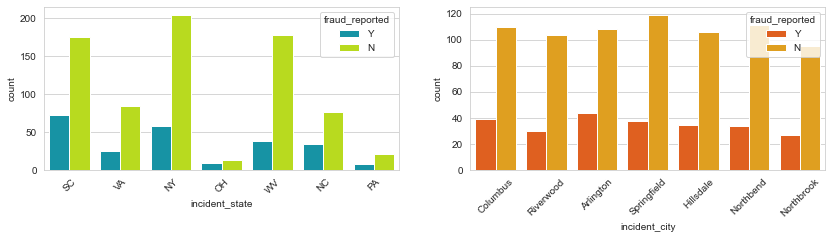

In [46]:
f=plt.figure(figsize=(14,3))
f.add_subplot(1,2,1)
sns.countplot(x=df['incident_state'],hue=df['fraud_reported'],palette='nipy_spectral')
plt.xticks(rotation=45)
f.add_subplot(1,2,2)
sns.countplot(x=df['incident_city'],hue=df['fraud_reported'],palette='autumn')
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

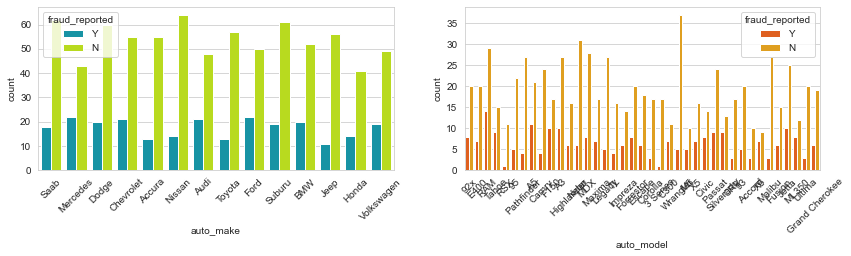

In [47]:
f=plt.figure(figsize=(14,3))
f.add_subplot(1,2,1)
sns.countplot(x=df['auto_make'],hue=df['fraud_reported'],palette='nipy_spectral')
plt.xticks(rotation=45)
f.add_subplot(1,2,2)
sns.countplot(x=df['auto_model'],hue=df['fraud_reported'],palette='autumn')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

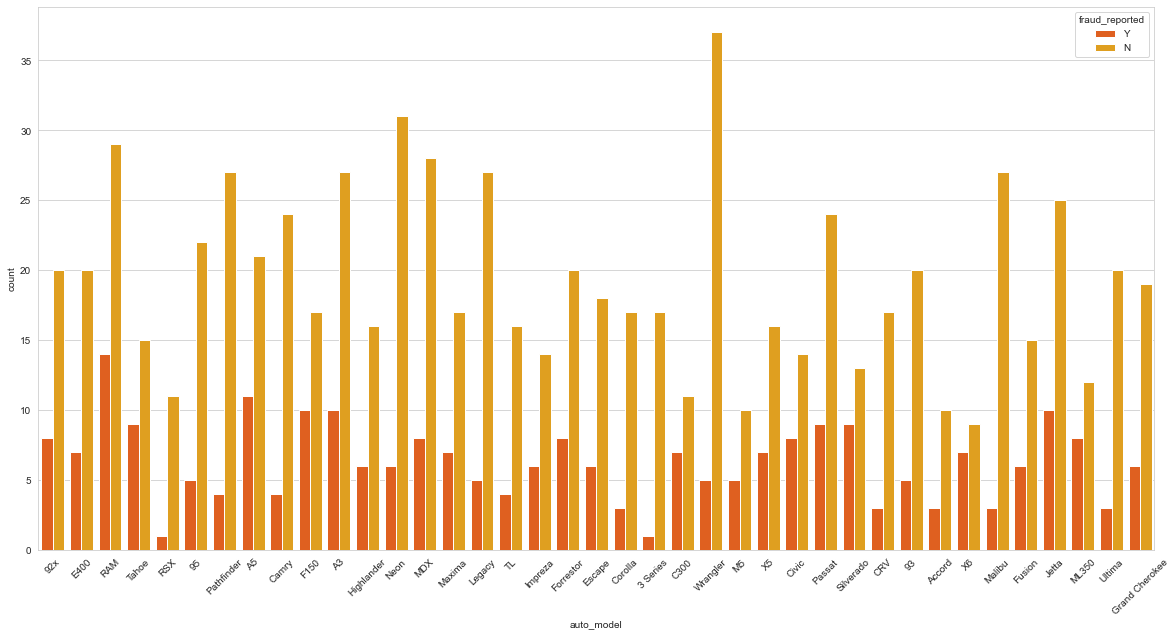

In [48]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['auto_model'],hue=df['fraud_reported'],palette='autumn')
plt.xticks(rotation=45)

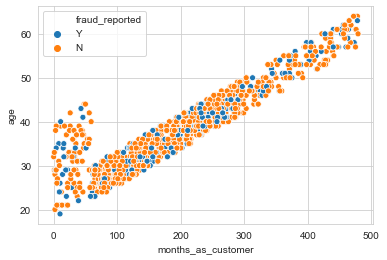

In [49]:
sns.scatterplot(x=df['months_as_customer'],y=df['age'],hue=df['fraud_reported'])

###### Age is having direct strong positive correlation with months_as_customer ,as it is also realistic ,higher the age higher will be the customers time.

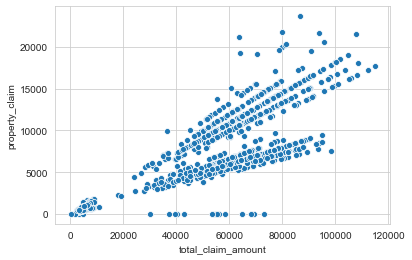

In [50]:
sns.scatterplot(x=df['total_claim_amount'],y=df['property_claim'])

###### Total_claim_amount is aggregation of various claim_amounts ,so it is showing positive correlation with property_clam amount.

In [51]:
df['incident_date']

0     2015-01-25
1     2015-01-21
2     2015-02-22
3     2015-10-01
4     2015-02-17
         ...    
995   2015-02-22
996   2015-01-24
997   2015-01-23
998   2015-02-26
999   2015-02-26
Name: incident_date, Length: 1000, dtype: datetime64[ns]

In [52]:
df['year']=df['incident_date'].apply(lambda x:x.year)
df['month']=df['incident_date'].apply(lambda x:x.month)
df['day']=df['incident_date'].apply(lambda x:x.day)

In [53]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,year,month,day
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,married,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2015,1,25
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,No Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,2015,1,21
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,married,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2015,2,22
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,YES,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,2015,10,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,No Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2015,2,17


In [54]:
df['year'].value_counts()

2015    1000
Name: year, dtype: int64

In [55]:
df['month'].value_counts()

1     365
2     312
12     39
8      39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: month, dtype: int64

In [56]:
df['day'].value_counts()

1     200
2     199
24     41
17     41
21     38
13     37
14     37
22     34
19     33
28     33
18     33
16     32
20     32
23     32
15     31
25     28
26     28
27     27
30     21
31     20
3      12
29     11
Name: day, dtype: int64

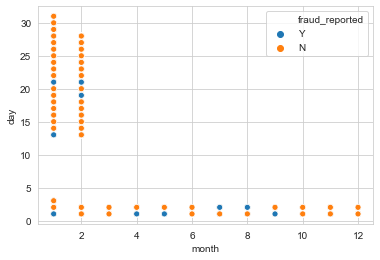

In [57]:
sns.scatterplot(x=df['month'],y=df['day'],hue=df['fraud_reported'])

###### There is no significant relation between month year and day of insurance claim fraud. There is high number of insaurance claims in 1st and 2nd month and 1st and 2nd day of month.

In [58]:
# Let's drop unnecessary columns
df.drop(['policy_number','policy_bind_date','insured_zip','incident_location','incident_date','year','month','day'],axis=1,inplace=True)

In [59]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [60]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [61]:
from scipy.stats import skew

In [62]:
skew_value=skew(df[['months_as_customer','age','policy_deductable','policy_annual_premium',
                    'umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day',
                    'number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount',
                    'property_claim','vehicle_claim',
                    'auto_year']],nan_policy='omit')

svalue=pd.concat([pd.DataFrame(list(['months_as_customer','age','policy_deductable',
                                     'policy_annual_premium','umbrella_limit','capital-gains',
                                     'capital-loss','incident_hour_of_the_day',
                                     'number_of_vehicles_involved','bodily_injuries','witnesses',
                                     'total_claim_amount','property_claim','vehicle_claim',
                                     'auto_year']),columns=['Features']),
                 pd.DataFrame(list(skew_value),columns=['Skew Degree'])],axis=1)

svalue.sort_values(by='Skew Degree',ascending=False)

,Features,Skew Degree
4,umbrella_limit,1.804001
8,number_of_vehicles_involved,0.501910
1,age,0.478269
5,capital-gains,0.478132
2,policy_deductable,0.477170
12,property_claim,0.377601
0,months_as_customer,0.361633
10,witnesses,0.019607
9,bodily_injuries,0.014755
3,policy_annual_premium,0.004395


In [63]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
for col in df.columns:
    if df[col].dtype== 'object':
        df[col]=encoder.fit_transform(df[col])

In [64]:
df.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,3,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,1,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,2,0,35100,0,0,2,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,2,2,48900,-62400,2,0,0,4,2,0,5,1,1,1,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,2,2,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0


In [65]:
from scipy.stats import zscore

z=np.abs(zscore(df))

df1=df[(z<3).all(axis=1)]

In [66]:
df1.shape

(980, 34)

###### Not removing skewness ,as it is creating null values which leads to more skewness in data.

### Splitting independent and dependent features

In [69]:
x=df1.drop('fraud_reported',axis=1)
y=df1['fraud_reported']

In [70]:
print("Independent variabales shape - ",x.shape)
print("Dependent variables shape - ",y.shape)

Independent variabales shape -  (980, 33)
Dependent variables shape -  (980,)


In [71]:
features=x.columns

### Splitting dataset into training and testing

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [73]:
print(),print("~~~~~~~~~~~~~~~ **** Dimensions **** ~~~~~~~~~~~~~~~")
print("Training - ",X_train.shape,Y_train.shape)
print("Testing - ",X_test.shape,Y_test.shape)


~~~~~~~~~~~~~~~ **** Dimensions **** ~~~~~~~~~~~~~~~
Training -  (784, 33) (784,)
Testing -  (196, 33) (196,)


In [74]:
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
X=scale.fit_transform(x)
x=pd.DataFrame(X,columns=features)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc

from sklearn.model_selection import cross_val_score,GridSearchCV

In [76]:
# function for checking best random state
def max_acc_score(clf,x,y):
    max_acc=0
    for r_state in range(42,101):
        X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.2,random_state=42)
        clf.fit(X_train,Y_train)
        pred=clf.predict(X_test)
        acc_s=accuracy_score(Y_test,pred)
        if acc_s>max_acc:
            max_acc=acc_s
            final_r_state=r_state
    print("The maximum r2 score", max_acc, "is achieved at r_state", final_r_state)
    return final_r_state

In [77]:
# Using GridSearchCV to select best parameter for the models
kn=KNeighborsClassifier()
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
gdk=GridSearchCV(kn,parameters)
gdk.fit(X_train,Y_train)
gdk.best_params_

{'n_neighbors': 10}

In [78]:
# Using GridSearchCV 
dt=DecisionTreeClassifier()
parameters={'criterion':('ginni','entropy')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(X_train,Y_train)
gdd.best_params_

{'criterion': 'entropy'}

# Using GridSearchCV 
sv=SVC()
parameters={'kernel':['linear','sigmoid','poly','rbf'], 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(X_train,Y_train)
gdsr.best_params_

In [79]:
# Using GridSearchCV 
rf=RandomForestClassifier()
parameters={'n_estimators':(50,100,200)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(X_train,Y_train)
gdrf.best_params_

{'n_estimators': 50}

In [80]:
# Using GridSearchCV 
gb=GradientBoostingClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(X_train,Y_train)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [81]:
# Using GridSearchCV 
ad=AdaBoostClassifier()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(X_train,Y_train)
gad.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [85]:
LR=LogisticRegression()
sv=SVC(C=10)
dt=DecisionTreeClassifier(criterion='entropy')
kn=KNeighborsClassifier(n_neighbors = 10)
gnb=GaussianNB()
rf=RandomForestClassifier(n_estimators = 50)
ad=AdaBoostClassifier(learning_rate= 0.001, n_estimators= 10)
gb=GradientBoostingClassifier(learning_rate=0.1, n_estimators= 50)

In [86]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('SVC',sv))
models.append(('DecisionTreeClassifier',dt))
models.append(('KNeighborsClassifier',kn))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rf))
models.append(('AdaBoostclassifier',ad))
models.append(('GradientBoostingclassifier',gb))

In [87]:
Model=[]
score=[]
acc=[]
cv_score=[]
roc_score=[]
for name,model in models:
    print("~~~~~~~~******~~~~~~~~~~~",name,"~~~~~~~~~~******~~~~~~~~~~~~")
    
    Model.append(name)
    print("\n")
    model.fit(X_train,Y_train)
    print(model)
    sc=model.score(X_train,Y_train)
    print("Training score is -> ",sc*100)
    score.append(sc*100)
    pred=model.predict(X_test)
    acc_score=accuracy_score(Y_test,pred)
    print("Accuracy is -> ",acc_score*100)
    acc.append(acc_score*100)
    soc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print("Cross validation score -> ",soc*100)
    cv_score.append(soc*100)
    print(confusion_matrix(Y_test,pred))
    print(classification_report(Y_test,pred))
   
    fpr,tpr,threshold=roc_curve(Y_test,pred)
    roc_auc=auc(fpr,tpr)
    print("ROC_AUC score -> ,",roc_auc*100)
    roc_score.append(roc_auc*100)
    print()

~~~~~~~~******~~~~~~~~~~~ LogisticRegression ~~~~~~~~~~******~~~~~~~~~~~~


LogisticRegression()
Training score is ->  75.76530612244898
Accuracy is ->  73.9795918367347
Cross validation score ->  77.85714285714286
[[145   0]
 [ 51   0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       145
           1       0.00      0.00      0.00        51

    accuracy                           0.74       196
   macro avg       0.37      0.50      0.43       196
weighted avg       0.55      0.74      0.63       196

ROC_AUC score -> , 50.0

~~~~~~~~******~~~~~~~~~~~ SVC ~~~~~~~~~~******~~~~~~~~~~~~


SVC(C=10)
Training score is ->  75.89285714285714
Accuracy is ->  73.9795918367347
Cross validation score ->  73.67346938775509
[[145   0]
 [ 51   0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       145
           1       0.00      0.00      0.00        51

    accuracy                      

In [88]:
result = pd.DataFrame({'Model':Model,'Score':score,'Accuracy_score':acc,'cross_val_score':cv_score,'Roc_auc_curve':roc_score})
result

,Model,Score,Accuracy_score,cross_val_score,Roc_auc_curve
0,LogisticRegression,75.765306,73.979592,77.857143,50.000000
1,SVC,75.892857,73.979592,73.673469,50.000000
2,DecisionTreeClassifier,100.000000,76.530612,77.244898,71.426640
3,KNeighborsClassifier,77.423469,71.938776,75.408163,49.891819
4,GaussianNB,70.408163,67.857143,73.163265,51.582150
5,RandomForestClassifier,100.000000,77.040816,75.714286,62.237999
6,AdaBoostclassifier,81.760204,77.551020,80.918367,72.751859
7,GradientBoostingclassifier,95.535714,79.081633,82.857143,75.057471


###### Choosing GradientBoostingClassifier from all algorithms because its accuracy score is better than other, cross_validation_score_mean is also better than others and also roc_auc curve is quite good.

In [89]:
# best random state
max_acc_score(gb,x,y)

The maximum r2 score 0.8112244897959183 is achieved at r_state 56


56

In [90]:
# Using best random state
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=56)
gb=GradientBoostingClassifier(learning_rate=0.1, n_estimators= 50)
gb.fit(X_train,Y_train)
pred=gb.predict(X_test)
acc=accuracy_score(Y_test,pred)
cv=cross_val_score(gb,x,y,cv=5,scoring='accuracy').mean()
print("Accuracy score is", acc)
print("Cross val score is", cv)

Accuracy score is 0.8244897959183674
Cross val score is 0.8275510204081632


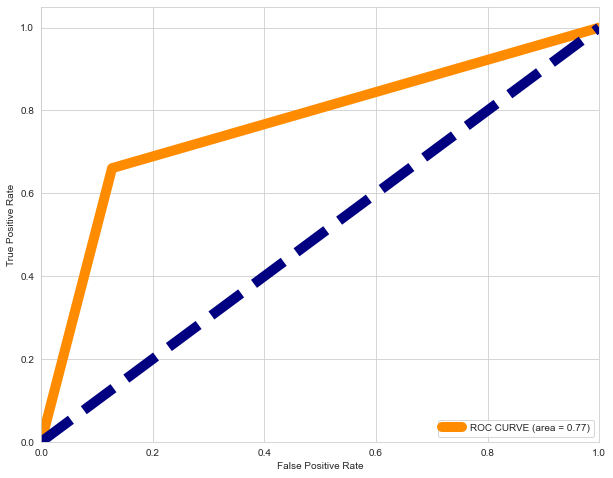

In [91]:
fpr,tpr,thresholds=roc_curve(Y_test,pred)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### Saving model

In [92]:
import joblib
filename='auto_insaurance.obj'
joblib.dump(gb,filename)

['auto_insaurance.obj']

In [93]:
# Loading model
model=joblib.load(filename)
model

GradientBoostingClassifier(n_estimators=50)

In [94]:
conclusion=pd.DataFrame([model.predict(X_test),Y_test],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244
Predicted,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
Original,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0
